Android Studio 설치
https://developer.android.com/studio 

python이 아님.. java / Kotlin 사용


#### New project

No activity

Name: 프로젝트 이름

Language: Java

Minimum SDK 지원되는 최소 버전 Android 7.0



In [2]:
import tensorflow as tf
import pathlib
import numpy as np
import matplotlib.pyplot as plt

# 전기생산금액
x = np.array([3.52,2.58,3.31,4.07,4.62,3.98,4.29, 4.83, 3.71, 4.61, 3.90,3.20])

# 전기소비량
y = np.array([2.48,2.27,2.47,2.77,2.98,3.05,3.18, 3.46, 3.03, 3.25, 2.67,2.53] )

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer='sgd', loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.fit(x, y, epochs=200, verbose=1)

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 28.7483
Epoch 2/200
1/1 [==============================] - 0s 5ms/step - loss: 12.9460
Epoch 3/200
1/1 [==============================] - 0s 6ms/step - loss: 5.8403
Epoch 4/200
1/1 [==============================] - 0s 6ms/step - loss: 2.6451
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 1.2083
Epoch 6/200
1/1 [==============================] - 0s 7ms/step - loss: 0.5623
Epoch 7/200
1/1 [==============================] - 0s 10ms/step - loss: 0.2718
Epoch 8/200
1/1 [==============================] - 0s 5ms/step - loss: 0.1411
Epoch 9/200
1/1 [==============================] - 0s 6ms/step - loss: 0.0824
Epoch 10/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0559
Epoch 11/200
1/1 [==============================] - 0s 6ms/step - loss: 0.0441
Epoch 12/200
1/1 [==============================] - 0s 11ms/step - loss: 0.0387
Epoch 13/200
1/1 [==============================] - 0s 5ms

In [5]:
model.evaluate(x,y)

1/1 [==============================] - 1s 614ms/step - loss: 0.0328


0.0327925905585289

In [6]:
model.predict([4])

1/1 [==============================] - 0s 454ms/step


array([[2.9043941]], dtype=float32)

In [9]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.6317755]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.37729222], dtype=float32)>]

In [7]:
slope = model.weights[0][0][0].numpy()
slope

0.6317755

In [11]:
intercept = model.weights[1][0].numpy()
intercept

0.37729222

In [12]:
# x=4인 경우
4*slope + intercept

2.904394209384918

In [13]:
y2 = slope * x + intercept

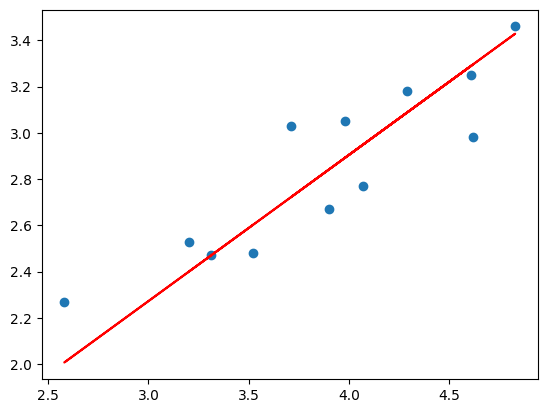

In [14]:
plt.scatter(x,y)
plt.plot(x, y2, c='red')
plt.show()

In [15]:
### 모델을 경량화

# 변환기
converter = tf.lite.TFLiteConverter.from_keras_model(model)  

# 변환 keras => lite모델로 작게 만듦
tflite_model = converter.convert()

with open('./reg_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\tjoeun\AppData\Local\Temp\tmph41mafh0\assets
